# Analysis of  Google Playstore Applications (2010-2018)
 Google playstore offers millions of Apps for its users mainly the andriod users. They cater to all age groups and offer contents which are suitable for some along with offering the ones which are suitable for everyone. They also provide  features where the users can drop the ratings, write reviews of the apps they have used or currently use. 
 
Along with that they also collect other data such as how many installations happened for each app, when it was last updated ,was it free or paid appliacation and what category or genre it belonged to.This heps google play store to drive their business and attract those application developers who are popular and increase business. 
 
 
Lets see a dataset where we have the following columns:App,Category,Rating,Reviews	,Size,Installs,Type,Price	Content Rating,Genres,Last Updated,Current Ver,Android Ver. Not all the columns are useful in prediction and decision making thus this analysis uses the most informative ones. 

<img src="Googleicon.jpg" style="width:800px;height:400px"/>


In [561]:
#importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud, STOPWORDS
from PIL import  Image
import PIL.Image

from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')

In [562]:
#importing various libraries for visualization

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

In [ ]:
#loading the csv files for analysis 
google= pd.read_csv('googleplaystore.csv')
google.head()

### Cleaning and Manipulating Data 

In [500]:
google[google['Rating'] >5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [501]:
#Droping this row because it is irrelevant
google.drop(index = 10472, inplace = True)


In [502]:
# Checking the datatypes of each column
google.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [503]:
#Checking for null values
google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [504]:
# Droping the non rated apps from the list
google['Rating'] =google['Rating'].fillna(value = 'NaN')
google.drop(google.loc[google['Rating']=='NaN'].index,inplace= True)

In [505]:
#Coverting the size column to float value 
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

google["Size"] = google["Size"].map(change_size)

#filling Size which had NA
google.Size.fillna(method = 'ffill', inplace = True)



In [506]:
#Dropping the '+' symbol from installs column
google.Installs=google.Installs.apply(lambda x: x.strip('+'))
google.Installs=google.Installs.apply(lambda x: x.replace(',',''))
google.Installs=google.Installs.replace('Free',np.nan)
google.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up


In [507]:
#Splliting the last updated column into month and year
google["Last Updated"] = pd.to_datetime(google['Last Updated'])
google['year_added']=google['Last Updated'].dt.year
google['month_added']=google['Last Updated'].dt.month
google.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1


## Do the Ratings seem different from one another ? 

Text(0.5, 1, 'Boxplot of Rating VS Category')

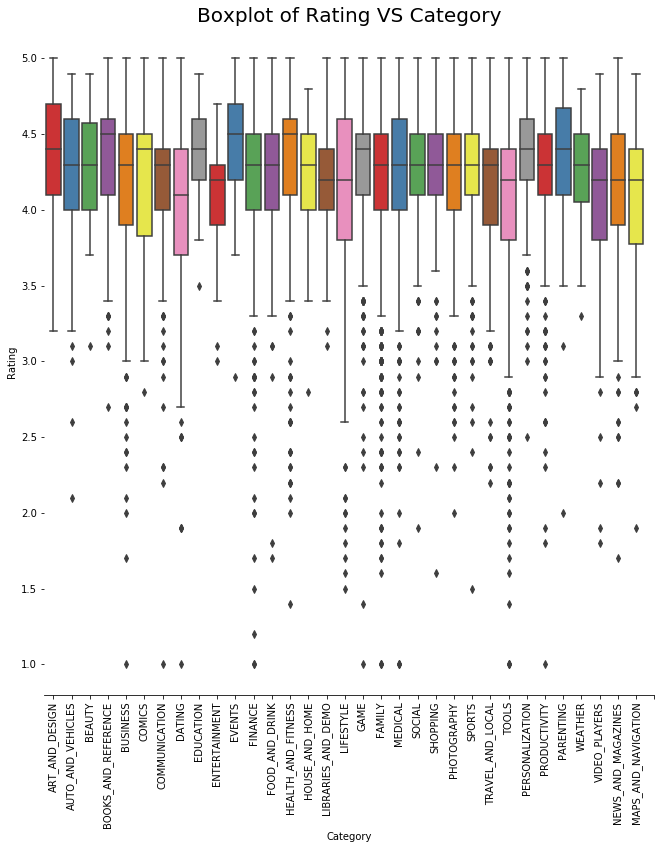

In [508]:
g = sns.catplot(x="Category",y="Rating",data=google, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

#### Well ,it almost seems like they are similar to each other . Lets check out a way to prove otherwise ,since we know they are different because they belong to different categories.

## One Way ANOVA Test
The one-way variance analysis (ANOVA) is used to determine whether there are statistically significant variations between the means of two or more separate (unrelated) groups. Here we are using this analysis to see if the categories have different means from each other since they seem to be almost the same 

In [509]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [510]:
new_dataset = google.loc[:, ['Rating','Genres']]
new_dataset.head(11)

,Rating,Genres
0,4.1,Art & Design
1,3.9,Art & Design;Pretend Play
2,4.7,Art & Design
3,4.5,Art & Design
4,4.3,Art & Design;Creativity
5,4.4,Art & Design
6,3.8,Art & Design
7,4.1,Art & Design
8,4.4,Art & Design
9,4.7,Art & Design;Creativity


In [511]:
new_dataset['Rating'] = google['Rating'].astype(int)
p=new_dataset.groupby('Genres').mean()

teamcountf=p.reset_index()
teamcountf.head(10)

,Genres,Rating
0,Action,3.885475
1,Action;Action & Adventure,3.941176
2,Adventure,3.794521
3,Adventure;Action & Adventure,4.000000
4,Adventure;Brain Games,4.000000
5,Adventure;Education,4.000000
6,Arcade,3.893720
7,Arcade;Action & Adventure,3.933333
8,Arcade;Pretend Play,4.000000
9,Art & Design,3.928571


In [512]:
lm=ols('Rating~Genres',data=teamcountf).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Genres,114.0,4.668466e+00,0.040951,0.0,NaN
Residual,0.0,5.440971e-27,inf,NaN,NaN


Since the value of F<.05 ,it indicates that the mean of ratings are statistically different from each other . Hence we can go ahead with our analysis on the data.

### Range of Ratings of Apps on Google Play Store

Text(0.5, 1.0, 'Distribution of Rating')

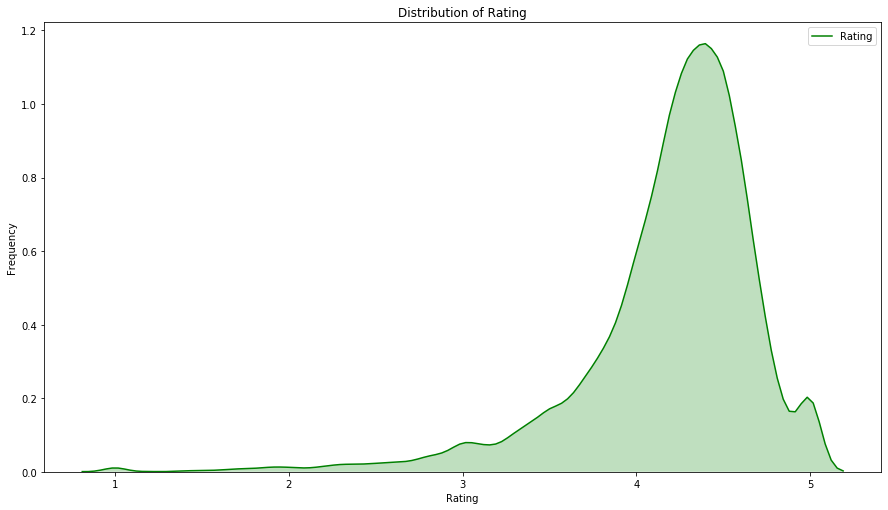

In [513]:
rcParams['figure.figsize'] = 15,8.27
g = sns.kdeplot(google.Rating, color="Green", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating')

In [514]:
google["Rating"].mean()

4.191757420456978

### Range of Reviews on Google Playstore

Text(0.5, 1.0, 'Distribution of Reviews')

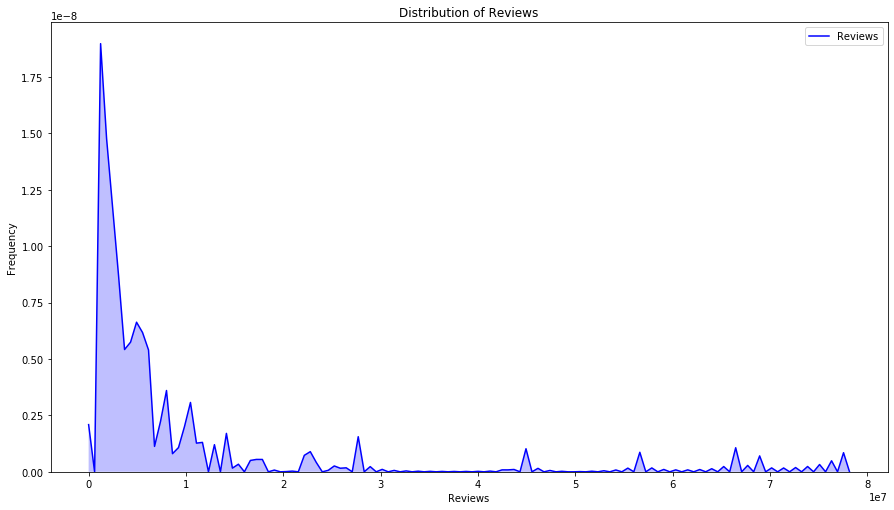

In [515]:
google['Reviews'] = google['Reviews'].astype(float)
rcParams['figure.figsize'] = 15,8.27
g = sns.kdeplot(google.Reviews, color="Blue", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reviews')

Text(0.5, 1.0, 'Distribution of Installs')

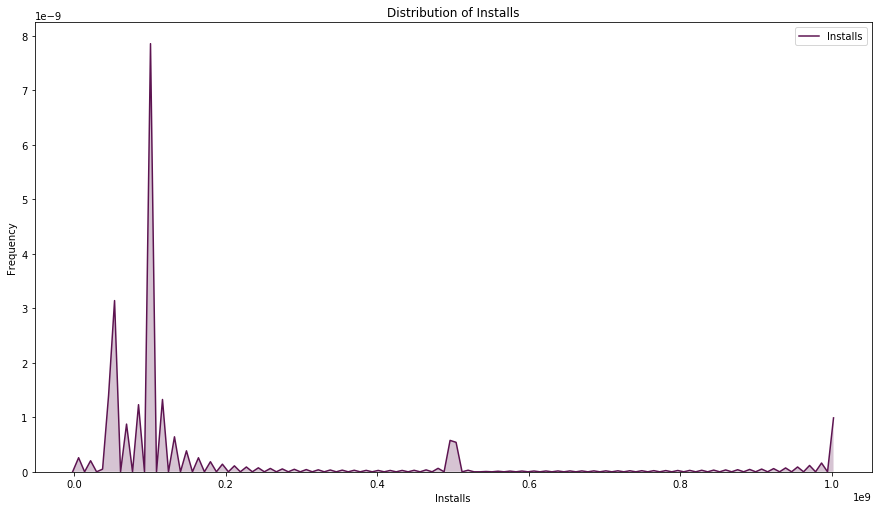

In [516]:
google['Installs'] = google['Installs'].astype(float)
rcParams['figure.figsize'] = 15,8.27
g = sns.kdeplot(google.Installs, color="#5d1451", shade = True)
g.set_xlabel("Installs")
g.set_ylabel("Frequency")
plt.title('Distribution of Installs')

1. The Average rating of apps on google playstore is between 3.0-5.0
2. The Average number of Reviews on Googleplay store is between 0-10000000.
3. The Avaerage number of Installs on Google playstore is between 0-200000000
4. Thus we can say that the not all people who download apps write reviews. Since the number installs is higher compared to the number of reviews.


## Most Popular Genres 

In [517]:
google['Installs'] = google['Installs'].astype(float)
p1=google.groupby('Genres').mean().sort_values(by='Installs',ascending=False)
largest_install=p1.nlargest(12,['Installs']).head(12)
axxy=largest_install.reset_index()
axxy

,Genres,Reviews,Size,Installs,year_added,month_added
0,Communication,2.486164e+06,1.455749e+07,9.953427e+07,2017.463415,6.536585
1,Adventure;Action & Adventure,3.087739e+06,5.075385e+07,6.970385e+07,2017.615385,7.076923
2,Social,2.398614e+06,2.197399e+07,5.432371e+07,2017.640927,6.749035
3,Casual,2.227453e+06,3.761189e+07,5.223124e+07,2017.281081,6.216216
4,Arcade,1.627973e+06,4.371884e+07,5.182163e+07,2017.270531,6.531401
5,Productivity,3.251189e+05,1.428383e+07,4.038766e+07,2017.373219,6.652422
6,Video Players & Editors,6.968409e+05,1.691809e+07,3.928416e+07,2017.253165,6.810127
7,News & Magazines,2.334760e+05,1.496141e+07,3.217258e+07,2017.725322,6.394850
8,Photography,6.735540e+05,1.964456e+07,3.182411e+07,2017.454259,6.435331
9,Puzzle;Action & Adventure,9.500174e+05,4.400000e+07,3.102000e+07,2017.800000,7.200000


### Top 12 most downloaded Genres on Playstore

In [518]:
dict1 = dict(zip(teamcountf.Genres,teamcountf.Rating))
# dict1
axxy['N_Ratings'] = axxy['Genres'].map(dict1)
axxy

,Genres,Reviews,Size,Installs,year_added,month_added,N_Ratings
0,Communication,2.486164e+06,1.455749e+07,9.953427e+07,2017.463415,6.536585,3.810976
1,Adventure;Action & Adventure,3.087739e+06,5.075385e+07,6.970385e+07,2017.615385,7.076923,4.000000
2,Social,2.398614e+06,2.197399e+07,5.432371e+07,2017.640927,6.749035,3.880309
3,Casual,2.227453e+06,3.761189e+07,5.223124e+07,2017.281081,6.216216,3.735135
4,Arcade,1.627973e+06,4.371884e+07,5.182163e+07,2017.270531,6.531401,3.893720
5,Productivity,3.251189e+05,1.428383e+07,4.038766e+07,2017.373219,6.652422,3.811966
6,Video Players & Editors,6.968409e+05,1.691809e+07,3.928416e+07,2017.253165,6.810127,3.601266
7,News & Magazines,2.334760e+05,1.496141e+07,3.217258e+07,2017.725322,6.394850,3.725322
8,Photography,6.735540e+05,1.964456e+07,3.182411e+07,2017.454259,6.435331,3.817035
9,Puzzle;Action & Adventure,9.500174e+05,4.400000e+07,3.102000e+07,2017.800000,7.200000,4.000000


## Comparisons - What do the Numbers indicate ?

In [519]:
ins=axxy['Installs']
gens=axxy['Genres']
rats=axxy['N_Ratings']
revz=axxy['Reviews']
siz=axxy['Size']

Text(0, 0.5, 'Installs')

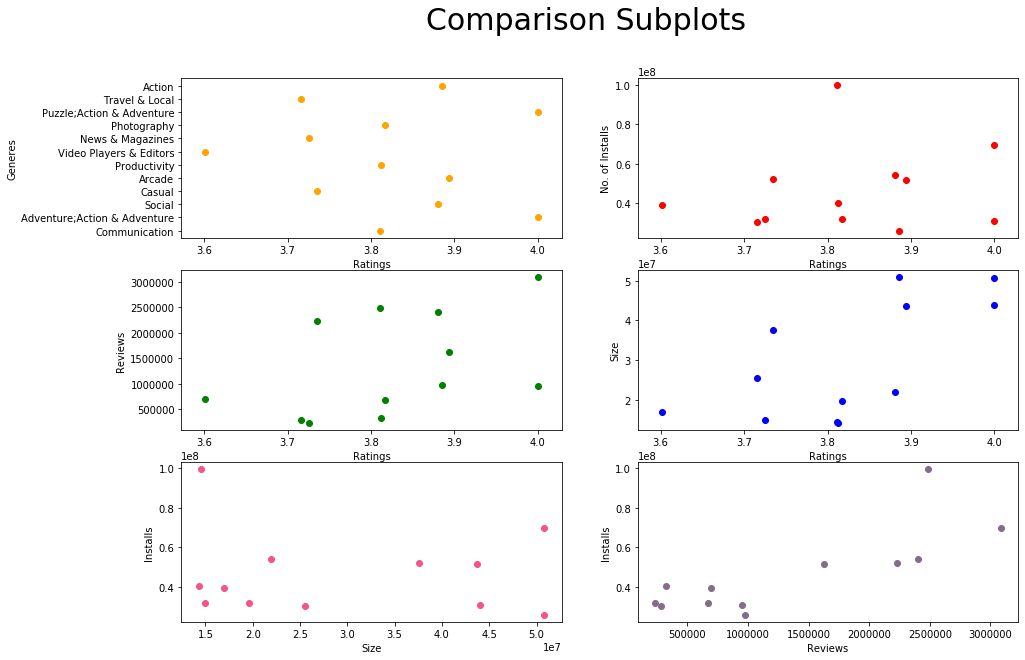

In [520]:
plt.figure(figsize=(15, 10))

plt.subplot(321)
ax1=plt.scatter(rats,gens,color='Orange')
plt.xlabel('Ratings')
plt.ylabel('Generes')


plt.subplot(322)
ax1=plt.scatter(rats,ins,color='Red')

plt.xlabel('Ratings')
plt.ylabel('No. of Installs')

plt.subplot(323)
ax2=plt.scatter(rats,revz,color='Green')

plt.xlabel('Ratings')
plt.ylabel('Reviews')

plt.subplot(324)
ax3=plt.scatter(rats,siz,color='Blue')
 
plt.suptitle('Comparison Subplots',fontsize=30)
plt.xlabel('Ratings')
plt.ylabel('Size')

plt.subplot(325)
ax3=plt.scatter(siz,ins,color='#f35588')
 
plt.suptitle('Comparison Subplots',fontsize=30)
plt.xlabel('Size')
plt.ylabel('Installs')

plt.subplot(326)
ax3=plt.scatter(revz,ins,color='#856c8b')
 
plt.suptitle('Comparison Subplots',fontsize=30)
plt.xlabel('Reviews')
plt.ylabel('Installs')

#### These Comaprisons Indicate the following  :
1. Communication and Adventure;Action & Adventure genres Apps  are the Highest rated and the most installed Apps.
2. Higher Reviews have higher Rating.
3. Smaller size apps are preffered for downloads.
4. More installed Apps more number of ratings .

## Top 25 most Popular Apps on Playstore

In [521]:
most=google.nlargest(12,['Installs']).head(12)
most.sort_values(by='Installs',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,5000000.0,1.000000e+09,Free,0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,2018,8
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56642847.0,35000000.0,1.000000e+09,Free,0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,2018,8
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,35000000.0,1.000000e+09,Free,0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,2018,8
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,17000000.0,1.000000e+09,Free,0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,2018,8
340,Gmail,COMMUNICATION,4.3,4604324.0,17000000.0,1.000000e+09,Free,0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,2018,8
341,Hangouts,COMMUNICATION,4,3419249.0,17000000.0,1.000000e+09,Free,0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,2018,7
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,66000000.0,1.000000e+09,Free,0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,2018,8
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578.0,66000000.0,1.000000e+09,Free,0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,2018,8
386,Hangouts,COMMUNICATION,4,3419433.0,79000.0,1.000000e+09,Free,0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,2018,7
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,14000000.0,1.000000e+09,Free,0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,2018,8


In [522]:
p11=google.groupby('App').sum().sort_values(by='Installs',ascending=False)
largest_install1=p11.nlargest(25,['Installs']).head(25)
axxy1=largest_install1.reset_index()
axxy1

,App,Reviews,Size,Installs,year_added,month_added
0,Subway Surfers,166331958.0,456000000.0,6.000000e+09,12108,42
1,Google Photos,43423827.0,97600000.0,4.000000e+09,8072,32
2,Hangouts,13677659.0,61079000.0,4.000000e+09,8072,28
3,Google News,3510978.0,52000000.0,4.000000e+09,8072,32
4,Instagram,266241989.0,204100000.0,4.000000e+09,8072,28
5,Google Drive,10922534.0,54100000.0,4.000000e+09,8072,31
6,Candy Crush Saga,156993136.0,518000000.0,3.500000e+09,14126,49
7,Maps - Navigate & Explore,27702141.0,94000000.0,3.000000e+09,6054,21
8,WhatsApp Messenger,207348304.0,118000000.0,3.000000e+09,6054,24
9,Google Chrome: Fast & Secure,28928148.0,57300000.0,3.000000e+09,6054,24


Text(0.5, 0, 'App')

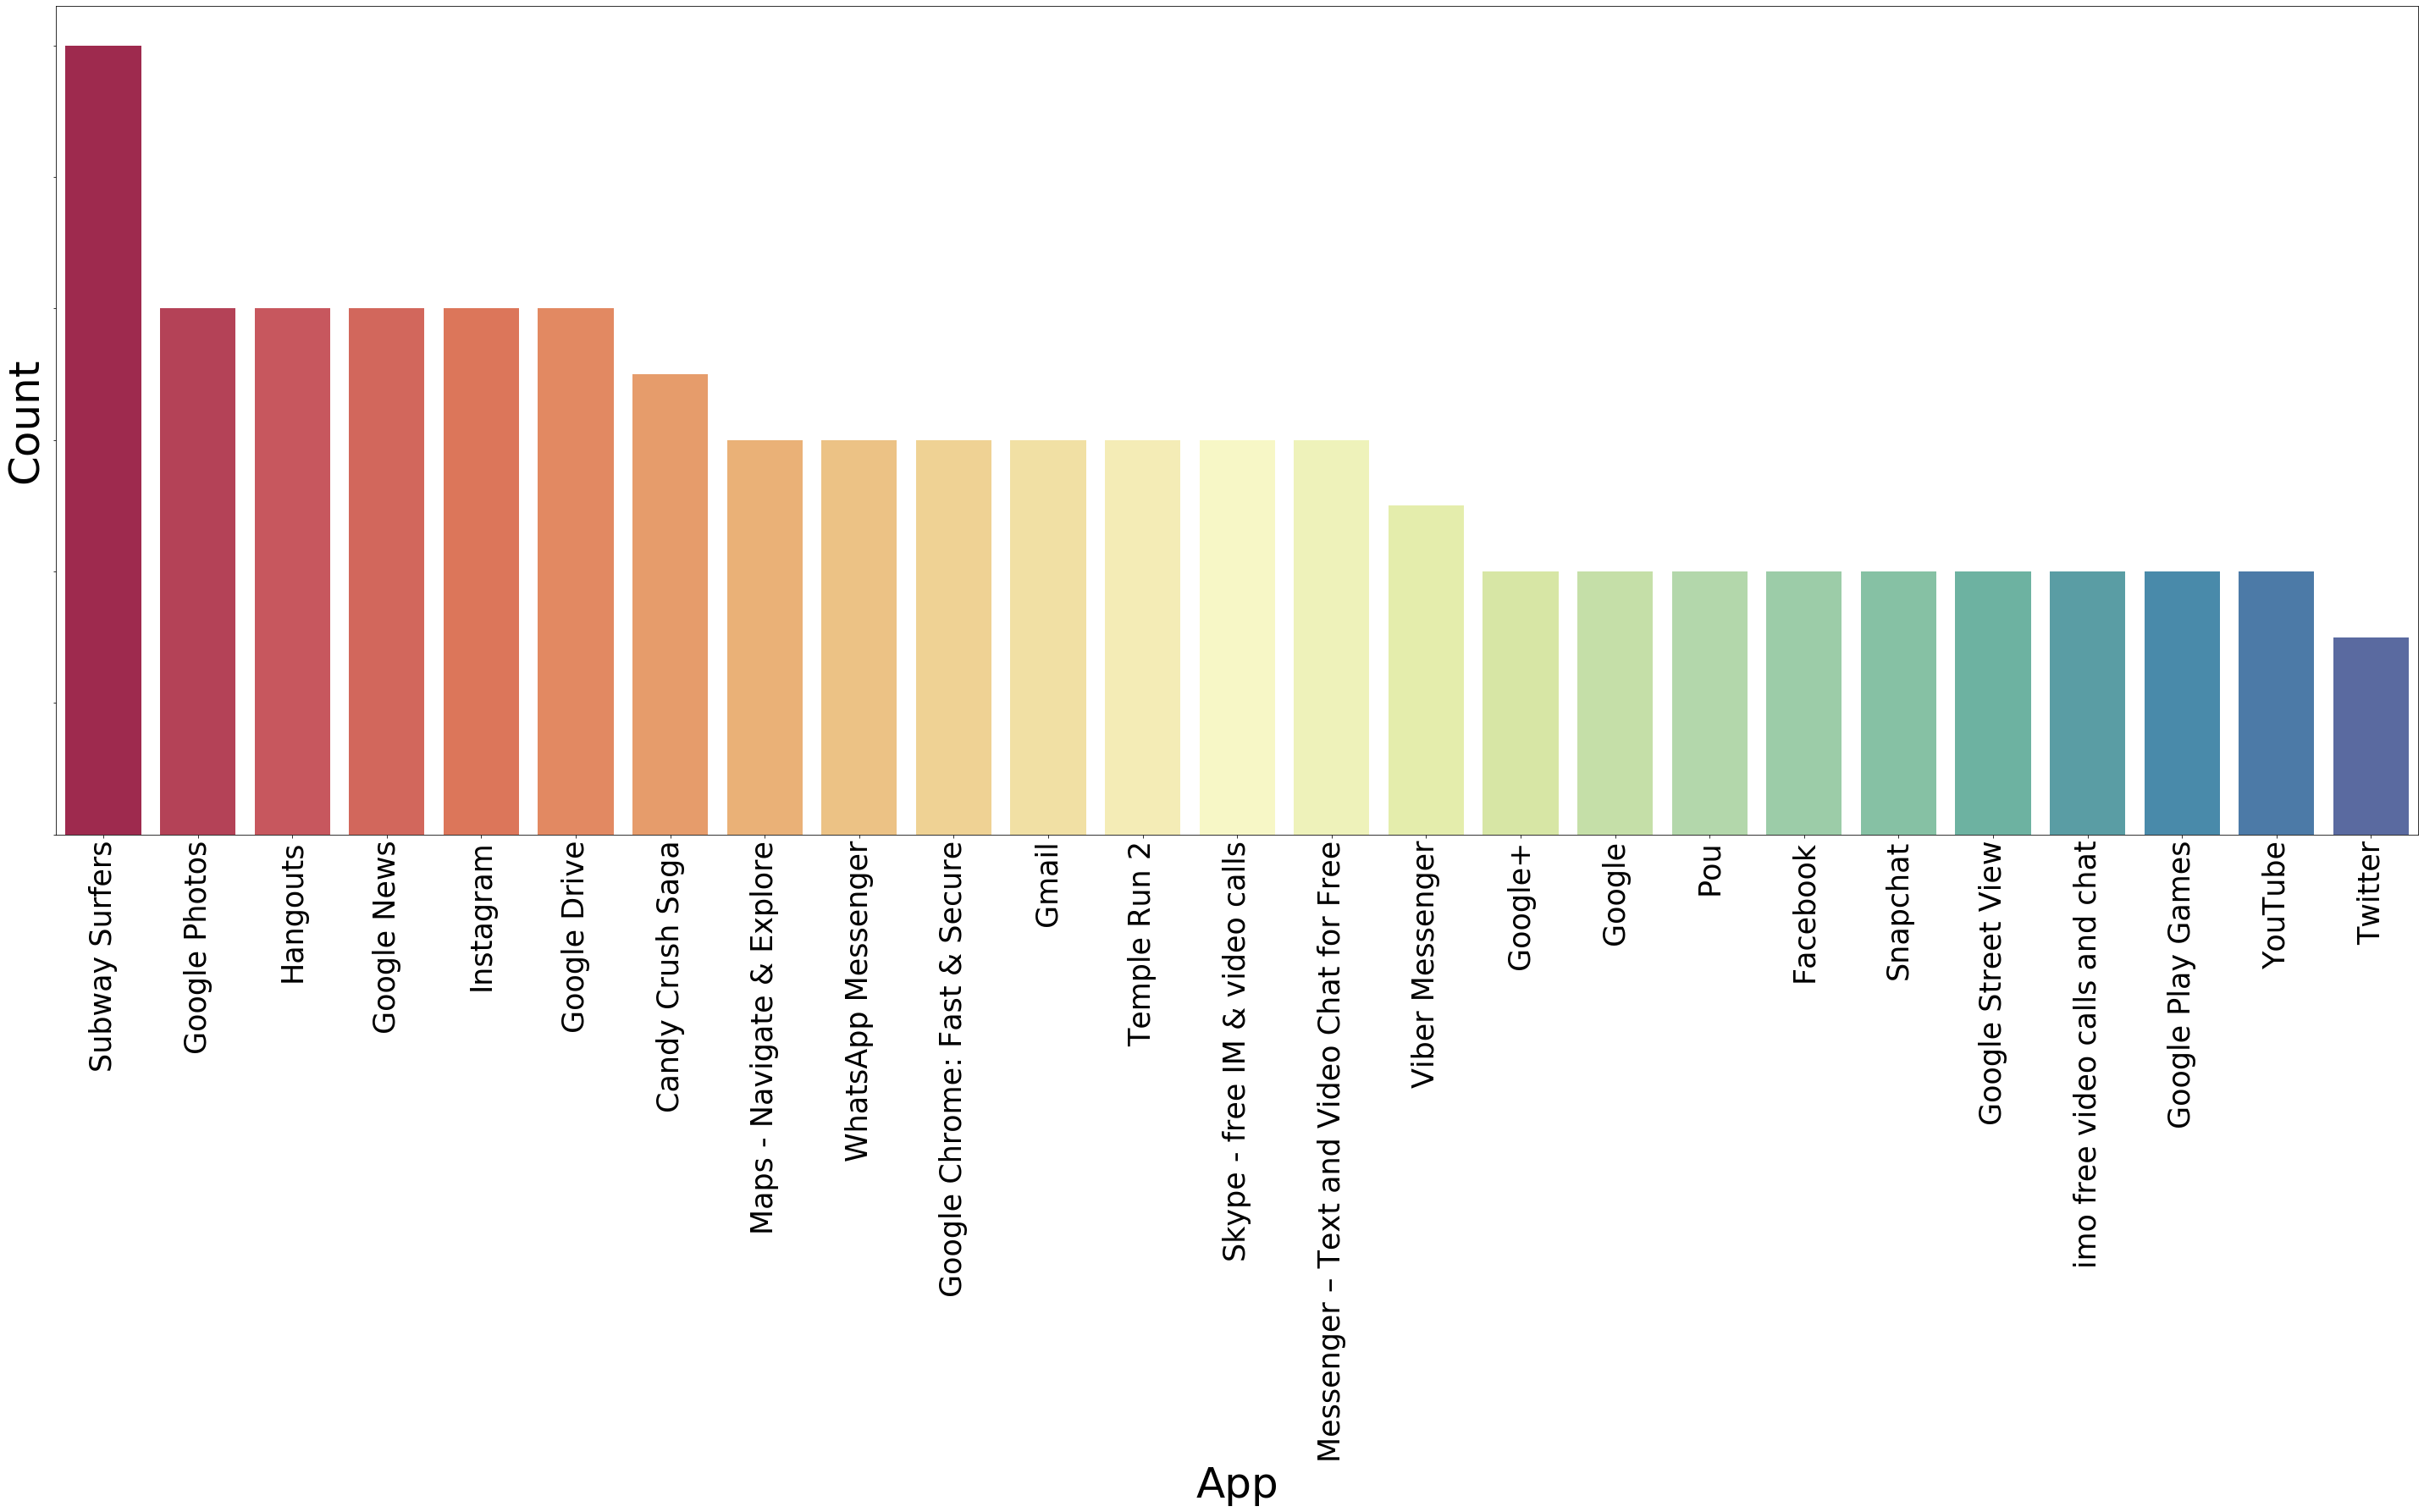

In [523]:
plt.figure(figsize=(50,18))


a = sns.barplot(x='App',y='Installs', data=axxy1, palette='Spectral')

a.set_xticklabels(a.get_xticklabels(), rotation = 90, fontsize = 35)
a.set_yticklabels(a.get_yticklabels(), rotation = 40, fontsize = 30)
a.set_ylabel('Count',fontsize=50)
a.set_xlabel('App',fontsize=50)

1. Most Popular App has been Subway Surfers.
2. It has the least in size hence it can be one of the reasons for its popularity.
3. Social media and games are the most downloaded apps .


## Money Making - Who and how much ?

### Lets first Check out the percntage of Paid Vs Free Apps
As we have seen , GooglePaystore offers a wide variety and category of Apps. Its upto the maker of the application to make it free or put a price on it. Many free apps however have in-app purchases which means that even though the entire app is free ,while using some features of it the user might have to purchase those features. But that is not a part of this analysis.Maybe later ..

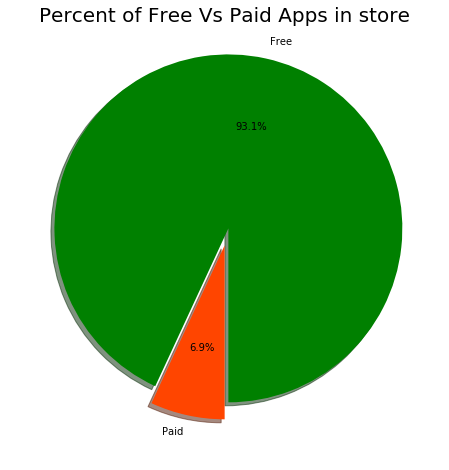

In [524]:
labels =google['Type'].value_counts(sort = True).index
sizes = google['Type'].value_counts(sort = True)


colors = ["Green","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

Well, I hope no one expected the results to be otherwise. 93.1% Apps og Playstore are free and the remaining 6.9% are paid. One cannot help but wonder what these paid apps are like , and how much do they cost, are they popular and what is price range people usually spend on google apps ? Lets find out.


###  Lets Check the Maturity level in the Paid Vs Free

In [525]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [526]:
free=google[google['Type']=='Free']
paid=google[google['Type']=='Paid']
col='Content Rating'
free1=free[col].value_counts().reset_index()
free1=free1.rename(columns={col:'count','index':col})
free1['percent']=free1['count'].apply(lambda x : 100*x/sum(free1['count']))
free1=free1.astype(str).sort_values(col)

paid1=paid[col].value_counts().reset_index()
paid1=paid1.rename(columns={col:'count','index':col})
paid1['percent']=paid1['count'].apply(lambda x : 100*x/sum(paid1['count']))
paid1=paid1.astype(str).sort_values(col)


trace1 = go.Scatter(x=free1[col], y=free1["count"], name="Free", marker=dict(color="blue"))
trace2 = go.Scatter(x=paid1[col], y=paid1["count"], name="Paid", marker=dict(color="green"))
y = [trace1, trace2]
layout={'title':"Maturity Ratings of the free vs paid app",'xaxis':{'title':"Maturity Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

Interesting to note that the free apps are avaialbe for all maurity levels . The paids ones however are only restricted to certain maturity levels. 

In [527]:
col='year_added'
free1=free[col].value_counts().reset_index()
free1=free1.rename(columns={col:'count','index':col})
free1['percent']=free1['count'].apply(lambda x : 100*x/sum(free1['count']))
free1=free1.astype(str).sort_values(col)

paid1=paid[col].value_counts().reset_index()
paid1=paid1.rename(columns={col:'count','index':col})
paid1['percent']=paid1['count'].apply(lambda x : 100*x/sum(paid1['count']))
paid1=paid1.astype(str).sort_values(col)


trace1 = go.Scatter(x=free1[col], y=free1["count"], name="Free", marker=dict(color="blue"))
trace2 = go.Scatter(x=paid1[col], y=paid1["count"], name="Paid", marker=dict(color="green"))
y = [trace1, trace2]
layout={'title':"Last Updated or Added Apps over the years",'xaxis':{'title':"years"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

The count of Paid and free apps updation and addition was the same until 2013 when it started drifting apart. More and more free apps were added and updated beyound that . There is a significant increase in the paid apps as well ,however it is nothing compared to the spike in free apps. 

We can say that people/users prefferred free apps more than the paid ones
Free apps were more useful and required updation more frequently to incorporate new features with time.


## Paid Apps Analysis 
Lets see the count on apps and their corresponding cost on playstore.

In [528]:
google['Price'].value_counts().head(30)

0           8719
$2.99        114
$0.99        107
$4.99         70
$1.99         59
$3.99         58
$1.49         31
$2.49         21
$5.99         18
$9.99         16
$6.99         13
$399.99       11
$14.99        10
$4.49          9
$3.49          7
$7.99          7
$29.99         6
$12.99         5
$11.99         5
$19.99         5
$24.99         5
$8.99          4
$16.99         3
$10.00         3
$5.49          3
$33.99         2
$79.99         2
$17.99         2
$1.00          2
$7.49          2
Name: Price, dtype: int64

In [529]:
# Converting the price column to dollar value
google.Price = google.Price.apply(lambda x: x.replace('$',''))
google['Price'] = google['Price'].apply(lambda x: float(x))

### Lets see the Rating across the price range 
Here we are simply taking the price column and their ratings. Here is regression fitted model to see the realtion between the prices and the rating . Is google play store baised ? Do paid apps have higher ratings. Although these two variable are not necessarily dependent on each other,but it is definitely of interest. Lets see if we  we can make some predictions and conclusions based on this current graph.

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

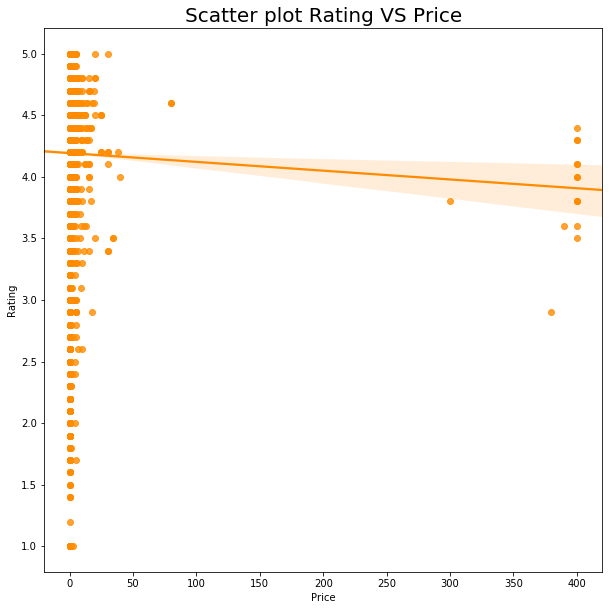

In [530]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=google);
plt.title('Scatter plot Rating VS Price',size = 20)

1. We can clearly see that many of the free apps are an outlier in this model, since most of the free apps have an average rating of 4. 
2. The paid apps have certainly a lower range of ratings . But still have many outliers . This idicated that paid apps have lower ratings . 
3. Users are not really satified with the apps based on the price they paid.


## Lets see a Price Distribution across different Categories

In [531]:
# grouping Categories and sorting is decending order by price
google.groupby('Category').mean()
g1=google[google.Price>0].sort_values(by='Price',ascending=False)
g1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300000.0,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018,5
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700000.0,50000.0,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,2017,11
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000000.0,10000.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,2018,3
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2700000.0,1000.0,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,2017,12
4197,most expensive app (H),FAMILY,4.3,6.0,1500000.0,100.0,Paid,399.99,Everyone,Entertainment,2018-07-16,1,7.0 and up,2018,7


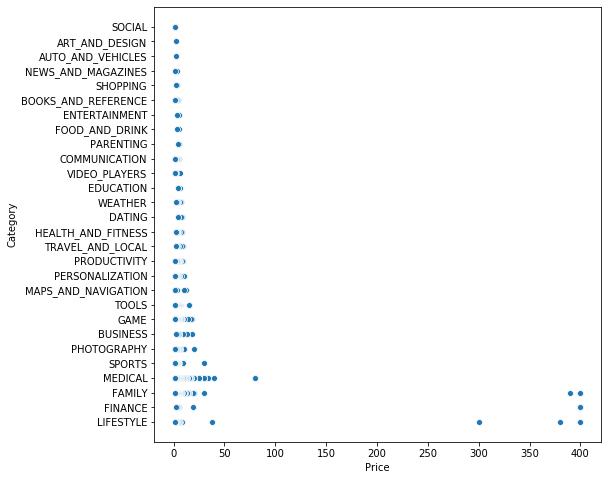

In [532]:
#Lets see which categories offer more number of  Paid apps and their corresponding price range 
paidz = sns.scatterplot(x="Price", y="Category",data=g1)

1. Family and Finance have the highest paid apps. Medical apps also significantly show that they are on the higer end. 
2. Gaming and business app fall in the lower priced range of paid apps
3. Social , art,shopping and news apps are the least expensive and mostly free .
4. We can say that the expensive paid apps have a target audience .



## Price Bands Analysis 
Here I am creating a price band or range to describe the wide range of apps which have different prices.

In [533]:
google.loc[ google['Price'] == 0.0, 'PriceRange'] = 'Free'
google.loc[(google['Price'] > 0.0) & (google['Price'] <= 0.99), 'PriceRange'] = 'Cheap'
google.loc[(google['Price'] > 0.99) & (google['Price'] <= 2.99), 'PriceRange']   = 'Affordable'
google.loc[(google['Price'] > 2.99) & (google['Price'] <= 4.99), 'PriceRange']   = 'Normal'
google.loc[(google['Price'] > 4.99) & (google['Price'] <= 14.99), 'PriceRange']   = 'Expensive'
google.loc[(google['Price'] > 14.99) & (google['Price'] <= 29.99), 'PriceRange']   = 'Too Expensive'
google.loc[(google['Price'] > 29.99), 'PriceRange']  = 'Exorbitant'

In [534]:
google.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added,PriceRange
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,Free


In [535]:
google[['PriceRange', 'Rating']].groupby(['PriceRange'], as_index=False)

In [536]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

In [537]:
flatui = []
for i in range(0,len(google['Category'].unique()),1):
    flatui.append(generate_color())

### Categories in Each Price Band
We can see below that not all categories have apps in each price band.Apss of all the categories surely are avaible for free. 

Text(0.5, 1, 'Category in each PriceRange VS Rating')

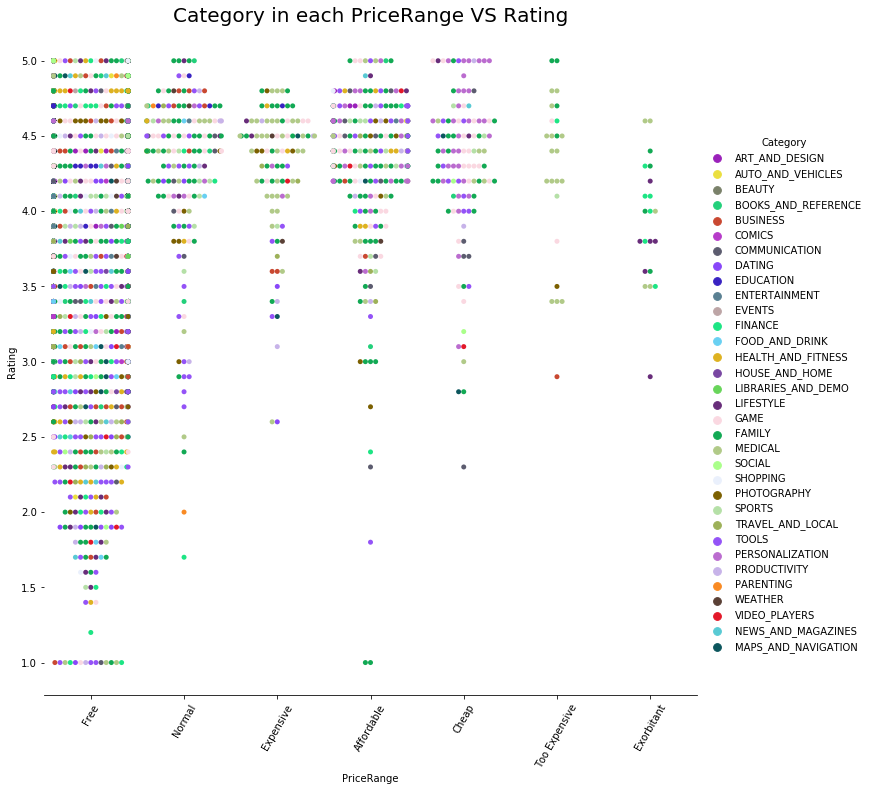

In [538]:
g = sns.catplot(x="PriceRange", y="Rating", hue="Category", kind="swarm", data=google,palette = flatui,size = 10)
g.despine(left=True)
g.set_xticklabels(rotation=60)
plt.title('Category in each PriceRange VS Rating',size = 20)